## Introduction
In this particular kernel, we will be exploring the Iris dataset that will contain the various values of petal length,width alongwith sepal length,width.

We shall be using the unsupervised learning method called KMeans clustering to label the various categories.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning

In [4]:
df.drop(['Id','Species'],inplace=True,axis=1)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['Species']=df.iloc[:,-1]

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.2
1,4.9,3.0,1.4,0.2,0.2
2,4.7,3.2,1.3,0.2,0.2
3,4.6,3.1,1.5,0.2,0.2
4,5.0,3.6,1.4,0.2,0.2


we have cleaned the data and all the string variables have been converted to numerical varibales


## Perform Unsuperivised Learning

In [8]:
df_labels=df['Species']
df.drop('Species',axis=1,inplace=True)

In [9]:
from sklearn.cluster import KMeans 

We must use elbow method to find the optimum number of clusters

In [17]:
wss=[]
x = df.iloc[:, [0, 1, 2, 3]].values
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(x)
    wss.append(KM.inertia_)

In [18]:
wss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34492380952378,
 46.535582051282034,
 38.930963049671746,
 34.190687924796634,
 30.001881875582672,
 27.962835725677838,
 26.883064935041272]

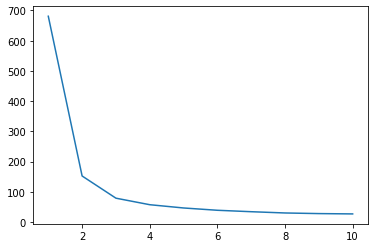

In [19]:
plt.plot(range(1,11), wss)

From the above plot, we see that There are 3 optimum number of clusters.

In [21]:
##Fittinf Predicting the model


kmeans = KMeans(n_clusters = 3)
pred=kmeans.fit_predict(x)

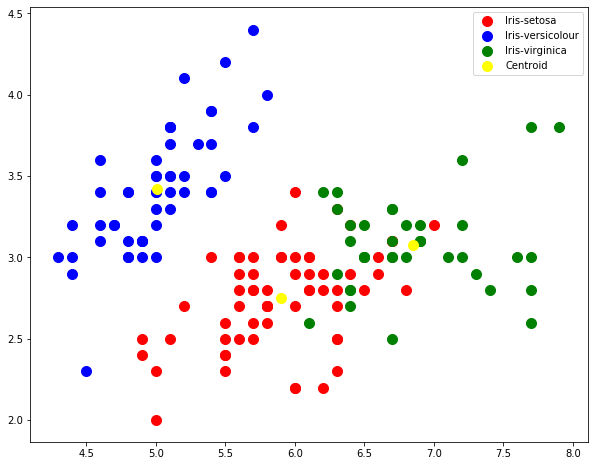

In [22]:
# Visualizing the cluster
plt.figure(figsize=(10,8))
plt.scatter(x[pred==0,0],x[pred==0,1],c='Red',s=100,label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,1],c='Blue',s=100,label = 'Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,1],c='Green',s=100,label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='Yellow',s=100,label='Centroid')
plt.legend()